In [42]:
import os
import torch
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configurazione
subfolder = "/media/mmd/Extreme SSD/work/bags/uni/no-qc/10x reinhard_fast"  # Cambia con il nome della sottocartella



In [43]:
import os
import torch
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configurazione

csv_file = "/media/mmd/Samsung_T5/GitHub/UMD/projects/I3lung-sqadqc-project/annotations.csv"  # File CSV con le label
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Carica il DataFrame con le label
df = pd.read_csv(csv_file)  # Assumendo che abbia colonne: 'filename' e 'label'
df = df.dropna(subset=["PDL1_CATHEGORY"])
df.set_index("slide", inplace=True)

# Carica tutti i file .pt
file_paths = [os.path.join(subfolder, f) for f in os.listdir(subfolder) if f.endswith(".pt")]

# Contenitori per le feature e le label
X_list = []
y_list = []

for file in file_paths:
    filename = os.path.basename(file).replace(".pt","")  # Estrai solo il nome del file
    print(filename)
    # Se il file non ha una label, viene saltato
    if filename not in df.index:
        #print(f"⚠️ {filename} non ha una label nel CSV, saltato.")
        continue  

    label = df.loc[filename, "PDL1_CATHEGORY"]  # Trova la label nel DataFrame

    # Se la label è NaN o None, salta il file
    if pd.isna(label):
        print(f"⚠️ {filename} ha una label mancante, saltato.")
        continue  

    data = torch.load(file, map_location=device)  # Carica il tensore
    print(data.shape)
    if isinstance(data, torch.Tensor):
        X_list.append(data.cpu().numpy())  # Sposta su CPU e converte in NumPy
        y_list.append(label)  # Assegna la label corretta
    else:
        print(f"⚠️ Formato non supportato in {filename}, atteso un torch.Tensor.")

# Controllo se ci sono abbastanza dati
if len(X_list) == 0:
    raise ValueError("❌ Nessun dato valido trovato. Controlla i file e le label nel CSV.")

# Converti in array NumPy

print(X_list[0].shape)
print(y_list[0])


# Calcolare la media di ogni array nella lista
X_aggregated = np.array([X.mean(axis=0) for X in X_list])

# Ora possiamo eseguire vstack
X_final = np.vstack(X_aggregated)

# Mostriamo il risultato
print("Dimensione di X_final:", X_final.shape)
print(X_final)


#X = np.vstack(X_list)
X = X_final
y = np.array(y_list)

print(X.shape, y.shape)

# Suddivisione train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dummy Classifier
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score

# Predizioni
y_pred = dummy_clf.predict(X_test)

# Accuratezza generale
acc = accuracy_score(y_test, y_pred)

# Report dettagliato per classe
report = classification_report(y_test, y_pred, digits=2, output_dict=True)

# Stampa dei risultati
print(f"Accuratezza del Dummy Classifier: {acc:.2f}\n")
print("Statistiche per classe:\n")
print(report)



DIG_PAT_1696325152
torch.Size([225, 1024])
DIG_PAT_1696325185
DIG_PAT_1696325261
torch.Size([299, 1024])
DIG_PAT_1696325298
torch.Size([539, 1024])
DIG_PAT_1696325346
torch.Size([261, 1024])
DIG_PAT_1696325384
torch.Size([859, 1024])
DIG_PAT_1696325458
DIG_PAT_1696325556
torch.Size([499, 1024])
DIG_PAT_1696325611
torch.Size([433, 1024])
DIG_PAT_1696325661
torch.Size([388, 1024])
DIG_PAT_1696325698
torch.Size([180, 1024])
DIG_PAT_1696325721
torch.Size([8062, 1024])
DIG_PAT_1696326112
torch.Size([189, 1024])
DIG_PAT_1696326144
torch.Size([2270, 1024])
DIG_PAT_1696326269
torch.Size([905, 1024])
DIG_PAT_1696326367
torch.Size([219, 1024])
DIG_PAT_1696326396
torch.Size([720, 1024])
DIG_PAT_1696326458
torch.Size([116, 1024])
DIG_PAT_1696326480
torch.Size([509, 1024])
DIG_PAT_1696326532
torch.Size([509, 1024])
DIG_PAT_1696326583
torch.Size([271, 1024])
DIG_PAT_1696326614
torch.Size([822, 1024])
DIG_PAT_1696326668
torch.Size([378, 1024])
DIG_PAT_1696326718
torch.Size([547, 1024])
DIG_PAT_169632

Accuratezza del Dummy Classifier: 0.34

Accuratezza per classe:
Classe 1-49 %: 0.31
Classe < 1 %: 0.35
Classe >=50 %: 0.35


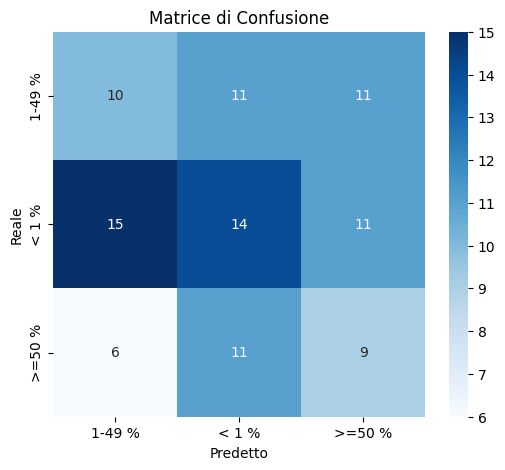

Accuratezza del Dummy Classifier: 0.34

Accuratezza per classe:
Classe 1-49 %: 0.31
Classe < 1 %: 0.35
Classe >=50 %: 0.35


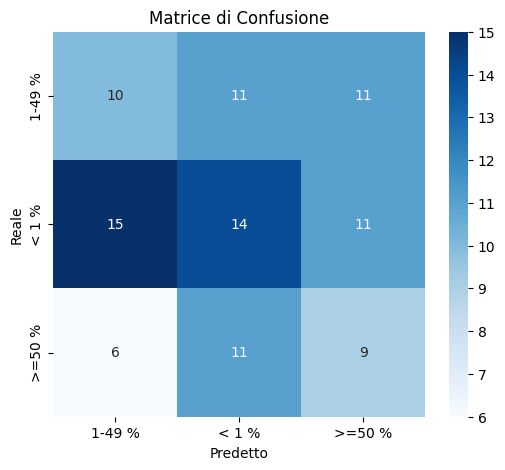

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predizioni
y_pred = dummy_clf.predict(X_test)

# Accuratezza totale
acc = accuracy_score(y_test, y_pred)

# Report dettagliato per classe
report = classification_report(y_test, y_pred, digits=2, output_dict=True)

# Estrazione dell'accuratezza per classe
class_accuracies = {f"Classe {label}": report[str(label)]["recall"] for label in np.unique(y_test)}

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Stampa dei risultati
print(f"Accuratezza del Dummy Classifier: {acc:.2f}\n")
print("Accuratezza per classe:")
for label, class_acc in class_accuracies.items():
    print(f"{label}: {class_acc:.2f}")

# Visualizzazione della matrice di confusione
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()


# Estrazione dell'accuratezza per classe
class_accuracies = {f"Classe {label}": report[str(label)]["recall"] for label in np.unique(y_test)}

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Stampa dei risultati
print(f"Accuratezza del Dummy Classifier: {acc:.2f}\n")
print("Accuratezza per classe:")
for label, class_acc in class_accuracies.items():
    print(f"{label}: {class_acc:.2f}")

# Visualizzazione della matrice di confusione
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()


In [45]:
import sys
sys.path.append("..")
sys.path.append("my_library")
from my_library.config import *
from my_library.metrics.cmp_metrics import *
sys.path.append("..")
import os

In [46]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
y_pred

array(['>=50 %', '1-49 %', '>=50 %', '>=50 %', '1-49 %', '1-49 %',
       '>=50 %', '< 1 %', '>=50 %', '>=50 %', '>=50 %', '>=50 %',
       '1-49 %', '>=50 %', '< 1 %', '1-49 %', '< 1 %', '< 1 %', '< 1 %',
       '< 1 %', '1-49 %', '1-49 %', '< 1 %', '< 1 %', '1-49 %', '1-49 %',
       '1-49 %', '>=50 %', '>=50 %', '>=50 %', '< 1 %', '>=50 %', '< 1 %',
       '< 1 %', '>=50 %', '< 1 %', '>=50 %', '>=50 %', '1-49 %', '>=50 %',
       '1-49 %', '>=50 %', '>=50 %', '1-49 %', '1-49 %', '>=50 %',
       '< 1 %', '1-49 %', '< 1 %', '< 1 %', '< 1 %', '1-49 %', '< 1 %',
       '1-49 %', '< 1 %', '>=50 %', '>=50 %', '1-49 %', '>=50 %',
       '>=50 %', '< 1 %', '1-49 %', '< 1 %', '< 1 %', '< 1 %', '< 1 %',
       '< 1 %', '< 1 %', '< 1 %', '1-49 %', '>=50 %', '< 1 %', '< 1 %',
       '< 1 %', '< 1 %', '< 1 %', '< 1 %', '>=50 %', '>=50 %', '< 1 %',
       '>=50 %', '1-49 %', '< 1 %', '1-49 %', '1-49 %', '< 1 %', '>=50 %',
       '1-49 %', '< 1 %', '1-49 %', '1-49 %', '1-49 %', '1-49 %',
       '

In [48]:
from sklearn.metrics import multilabel_confusion_matrix

In [49]:
true_y = y_test
predicted_classes = y_pred


# Compute standard metrics
accuracy = accuracy_score(true_y, predicted_classes)
weighted_accuracy = balanced_accuracy_score(true_y, predicted_classes)
precision = precision_score(true_y, predicted_classes, average="weighted", zero_division=0)
recall = recall_score(true_y, predicted_classes, average="weighted", zero_division=0)
f1 = f1_score(true_y, predicted_classes, average="weighted", zero_division=0)
#conf_matrix = multilabel_confusion_matrix(true_y, predicted_classes, labels=range(3))

# Compute per-class accuracy
#class_accuracies = {}
#for cls in range(3):
  #  cls_indices = (true_y == cls)
   # cls_accuracy = accuracy_score(true_y[cls_indices], predicted_classes[cls_indices]) if cls_indices.any() else 0.0
  #  class_accuracies[f"Accuracy_Class_{cls}"] = cls_accuracy

# Return metrics as a dictionary
abc = {
    "Accuracy": accuracy,
    "Weighted_Accuracy":weighted_accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    #"Confusion Matrix": conf_matrix.tolist(),
    #"Class Accuracies": class_accuracies
    }

In [50]:
def compute_metrics(parent_directory, n_classes, base_folder):
    parent_directory = base_folder

    out_lab, out = find_classes(base_folder)
    display(out_lab)
    print(f"This is outlab {len(out_lab)}")
    print(out)
    n_classes = len(out_lab)
    n_c = len(out_lab)

    averaged_predictions = load_and_average_predictions(parent_directory, n_c)
    from pprint import pprint
    import json

    #metrics = compute_metrics_with_class_accuracy(averaged_predictions, n_classes)
    metrics = compute_metrics_with_class_accuracy(averaged_predictions, n_c)


    display(metrics)
    
    for metric, value in metrics.items():
        if isinstance(value, dict):
            print(metric + ":")
            for sub_metric, sub_value in value.items():
                print(f"  {sub_metric}: {sub_value}")
        else:
            print(f"{metric}: {value}")

    # Plot confusion matrix
    class_values = out_lab.values()
    class_names = [f"Class {i}" for i in class_values]

    #class_names = [f"Class {i}" for i in range(n_classes)]
    
    conf_matrix = np.array(metrics["Confusion Matrix"])
    plot_confusion_matrix(conf_matrix, class_names, "YlGnBu")

In [51]:
abc

{'Accuracy': 0.336734693877551,
 'Weighted_Accuracy': 0.3362179487179487,
 'Precision': 0.34108697242337793,
 'Recall': 0.336734693877551,
 'F1-Score': 0.33781733244676315}